In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import datetime
import matplotlib.pylab as plt
import os
import seaborn as sbn
from scipy.stats import norm
from scipy.stats import lognorm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime
from dateutil import relativedelta
from scipy.optimize import fsolve

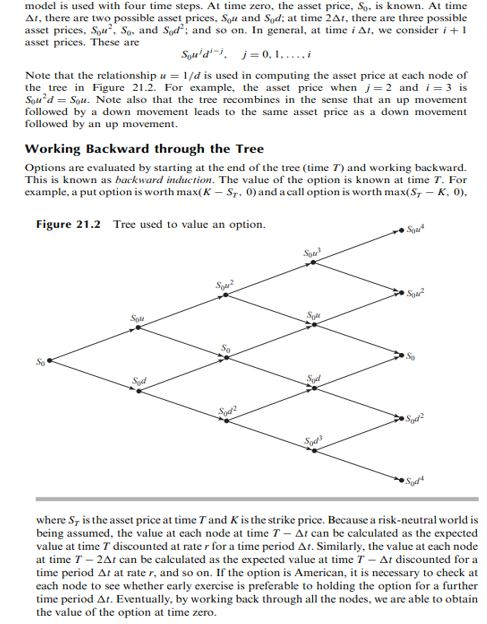

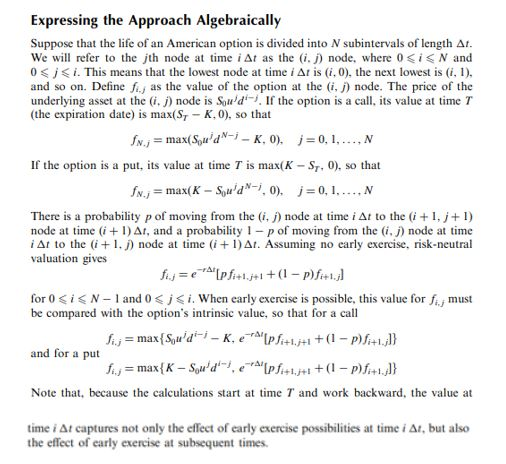

In [3]:
def Binomial_Model(vol,steps,r,q,S,K,T,option_style,option_type):
    
    # q = dividend yield or Foreign currency risk free rate
    # r = risk free rate (domestic)
    # vol = volatility of underlying asset
    # steps = Unlimited No of tree steps
    # S = Initial underlying asset price
    # K = Strike
    # T = life of option in years
    # option_style = if European then 1 and if American then 0
    # option_type = If call then 1 and if put then 0
    
    delta_t=T/steps   #time steps
    u=np.exp(vol*delta_t**0.5)   #up step size
    d=np.exp(-vol*delta_t**0.5) # down step size
    a=np.exp((r-q)*delta_t)   #growth factor per step
    p=(a-d)/(u-d)  # Probability of up move
    f=np.zeros((steps+1,steps*5))  # Initialize 2D matrix with zeros
    
    for i in range(steps,-1,-1):
        for j in range(i,-1,-1):
            if option_style==1:
                if (i==steps and option_type==1):
                    f[i,j]=np.maximum((S*(u**j))*(d**(steps-j))-K,0)
                elif (i==steps and option_type==0):
                    f[i,j]=np.maximum(K-(S*(u**j))*(d**(steps-j)),0)
                elif i!=steps:
                    f[i,j]=np.exp(-r*delta_t)*(p*f[i+1,j+1]+(1-p)*f[i+1,j])
            elif option_style==0:
                if (i==steps and option_type==1):
                    f[i,j]=np.maximum((S*(u**j))*(d**(steps-j))-K,0)
                elif (i==steps and option_type==0):
                    f[i,j]=np.maximum(K-(S*(u**j))*(d**(steps-j)),0)
                elif (i!=steps and option_type==1):
                    f[i,j]=np.maximum((S*(u**j))*(d**(i-j))-K,np.exp(-r*delta_t)*(p*f[i+1,j+1]+(1-p)*f[i+1,j]))
                elif (i!=steps and option_type==0):
                    f[i,j]=np.maximum(K-(S*(u**j))*(d**(i-j)),np.exp(-r*delta_t)*(p*f[i+1,j+1]+(1-p)*f[i+1,j]))
    return f[0,0]

In [4]:
Binomial_Model(0.4,50,0.1,0.02,50.0,50.0,1,0,0) # American Put option with dividend yield and 50 tree steps

6.2111980655836465